In [53]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl import Workbook
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from IPython.display import Image
from pandas import Series
import os
import time
from datetime import datetime
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 8]

## 201804699 이준석
### 1. 측정소 기준으로 월별 평균을 구하자
### 2. 측정소를 도/시로 통합하고 도시별 대기환경을 비교한다.(정규식으로 처리)
### ggplot2를 이용하여 결과 표현
- CO 일산화 탄소
- SO2 아황산가스
- O3 오존농도
- NO2 이산화질소농도
- PM10 미세먼지



In [54]:
df = pd.read_csv('/Users/adam/FinalTry.csv', encoding='utf-8')

In [3]:
df

,Unnamed: 0,측정소코드,측정일시,지역,측정소명,SO2,CO,O3,NO2,PM10
0,0,111121.0,2001-01-01 01:00:00,서울,중구,0.010000,0.8,0.012,0.0470,49.199978
1,1,111121.0,2001-01-01 02:00:00,서울,중구,0.010000,0.7,0.027,0.0400,49.199978
2,2,111121.0,2001-01-01 03:00:00,서울,중구,0.013000,0.9,0.015,0.0380,49.199978
3,3,111121.0,2001-01-01 04:00:00,서울,중구,0.014000,0.9,0.020,0.0360,49.199978
4,4,111121.0,2001-01-01 05:00:00,서울,중구,0.012000,0.7,0.032,0.0290,49.199978
...,...,...,...,...,...,...,...,...,...,...
46559559,53953461,831495.0,2021-04-30 20:00:00,인천 옹진군,울도,0.004872,0.3,0.046,0.0041,32.000000
46559560,53953462,831495.0,2021-04-30 21:00:00,인천 옹진군,울도,0.004872,0.3,0.045,0.0040,23.000000
46559561,53953463,831495.0,2021-04-30 22:00:00,인천 옹진군,울도,0.004872,0.3,0.041,0.0071,26.000000
46559562,53953464,831495.0,2021-04-30 23:00:00,인천 옹진군,울도,0.004872,0.3,0.035,0.0114,25.000000


In [56]:
df = df[['지역', '측정소코드','측정일시','SO2','CO','O3','NO2','PM10']]

In [57]:
df

,지역,측정소코드,측정일시,SO2,CO,O3,NO2,PM10
0,서울,111121.0,2001-01-01 01:00:00,0.010000,0.8,0.012,0.0470,49.199978
1,서울,111121.0,2001-01-01 02:00:00,0.010000,0.7,0.027,0.0400,49.199978
2,서울,111121.0,2001-01-01 03:00:00,0.013000,0.9,0.015,0.0380,49.199978
3,서울,111121.0,2001-01-01 04:00:00,0.014000,0.9,0.020,0.0360,49.199978
4,서울,111121.0,2001-01-01 05:00:00,0.012000,0.7,0.032,0.0290,49.199978
...,...,...,...,...,...,...,...,...
46559559,인천 옹진군,831495.0,2021-04-30 20:00:00,0.004872,0.3,0.046,0.0041,32.000000
46559560,인천 옹진군,831495.0,2021-04-30 21:00:00,0.004872,0.3,0.045,0.0040,23.000000
46559561,인천 옹진군,831495.0,2021-04-30 22:00:00,0.004872,0.3,0.041,0.0071,26.000000
46559562,인천 옹진군,831495.0,2021-04-30 23:00:00,0.004872,0.3,0.035,0.0114,25.000000


In [58]:
df.지역.unique()

array(['서울', '경기 수원시', '경기 성남시', '경기 의정부시', '경기 안양시', '경기 광명시', '경기 안산시',
       '경기 과천시', '경기 구리시', '경기 의왕시', '경기 시흥시', '경기 남양주시', '경기 평택시',
       '경기 고양시', '경기 용인시', '경기 이천시', '경기 김포시', '경기 군포시', '강원 양구군',
       '부산 중구', '부산 동구', '부산 영도구', '부산 부산진구', '부산 동래구', '부산 남구', '부산 사상구',
       '부산 북구', '부산 금정구', '부산 사하구', '부산 연제구', '경남 창원시', '울산 동구', '울산 중구',
       '울산 남구', '울산 울주군', '경남 진주시', '경남 김해시', '경남 거제시', '경남 양산시', '광주 동구',
       '광주 서구', '광주 북구', '광주 광산구', '전북 전주시', '전남 목포시', '전남 여수시', '전남 순천시',
       '전남 광양시', '전남 영암군', '제주 제주시', '대구 중구', '대구 서구', '대구 남구', '대구 북구',
       '대구 동구', '대구 수성구', '경북 포항시', '경북 경주시', '경북 김천시', '경북 안동시',
       '경북 구미시', '경북 영덕군', '경북 울릉군', '대전 대덕구', '대전 중구', '대전 유성구',
       '충북 청주시', '충남 천안시', '충남 서산시', '충남 태안군', '강원 원주시', '강원 강릉시',
       '강원 고성군', '충북 제천시', '전북 군산시', '전북 익산시', '전북 임실군', '인천 중구', '인천 동구',
       '인천 남동구', '인천 남구', '인천 부평구', '인천 서구', '인천 계양구', '인천 강화군', '경기 부천시',
       '경기 포천시', '강원 춘천시', '부산 강서구', '부산 기장군', '부산 수영구', '경기 하남시',
   

### 정규식을 활용하여 17개 도시 정보만 가져오자

In [59]:
df['정규지역'] = df.지역.str.extract(r'(\s\s)')

In [60]:
df['정규지역'] #실패했다....

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
46559559    NaN
46559560    NaN
46559561    NaN
46559562    NaN
46559563    NaN
Name: 정규지역, Length: 46559564, dtype: object

In [61]:
df = df[['지역', '측정소코드','측정일시','SO2','CO','O3','NO2','PM10']]

In [62]:
df1

,도시
0,서울
1,서울
2,서울
3,서울
4,서울
...,...
46559559,인천
46559560,인천
46559561,인천
46559562,인천


In [63]:
### 정규식을 활용하여 지역명을 17개로 줄이는데 성공했다.
n = df1.도시.unique()
print("도시의 개수: \n", len(n))

도시의 개수: 
 17


In [64]:
df1 = df1[['도시']]

In [65]:
df = pd.concat([df1, df], axis =1)
df

,도시,지역,측정소코드,측정일시,SO2,CO,O3,NO2,PM10
0,서울,서울,111121.0,2001-01-01 01:00:00,0.010000,0.8,0.012,0.0470,49.199978
1,서울,서울,111121.0,2001-01-01 02:00:00,0.010000,0.7,0.027,0.0400,49.199978
2,서울,서울,111121.0,2001-01-01 03:00:00,0.013000,0.9,0.015,0.0380,49.199978
3,서울,서울,111121.0,2001-01-01 04:00:00,0.014000,0.9,0.020,0.0360,49.199978
4,서울,서울,111121.0,2001-01-01 05:00:00,0.012000,0.7,0.032,0.0290,49.199978
...,...,...,...,...,...,...,...,...,...
46559559,인천,인천 옹진군,831495.0,2021-04-30 20:00:00,0.004872,0.3,0.046,0.0041,32.000000
46559560,인천,인천 옹진군,831495.0,2021-04-30 21:00:00,0.004872,0.3,0.045,0.0040,23.000000
46559561,인천,인천 옹진군,831495.0,2021-04-30 22:00:00,0.004872,0.3,0.041,0.0071,26.000000
46559562,인천,인천 옹진군,831495.0,2021-04-30 23:00:00,0.004872,0.3,0.035,0.0114,25.000000


In [66]:
df = df[['도시', '측정일시', 'SO2','CO','O3','NO2','PM10']]

In [67]:
df #데이터 정규식까지 전처리 끝... 이제 분석할 수 있겠다..

,도시,측정일시,SO2,CO,O3,NO2,PM10
0,서울,2001-01-01 01:00:00,0.010000,0.8,0.012,0.0470,49.199978
1,서울,2001-01-01 02:00:00,0.010000,0.7,0.027,0.0400,49.199978
2,서울,2001-01-01 03:00:00,0.013000,0.9,0.015,0.0380,49.199978
3,서울,2001-01-01 04:00:00,0.014000,0.9,0.020,0.0360,49.199978
4,서울,2001-01-01 05:00:00,0.012000,0.7,0.032,0.0290,49.199978
...,...,...,...,...,...,...,...
46559559,인천,2021-04-30 20:00:00,0.004872,0.3,0.046,0.0041,32.000000
46559560,인천,2021-04-30 21:00:00,0.004872,0.3,0.045,0.0040,23.000000
46559561,인천,2021-04-30 22:00:00,0.004872,0.3,0.041,0.0071,26.000000
46559562,인천,2021-04-30 23:00:00,0.004872,0.3,0.035,0.0114,25.000000


In [31]:
df.groupby(df['도시']).mean() #월별로 묶어서 평균을 구해야 하는데... 어떻게 하는걸까.... 

,SO2,CO,O3,NO2,PM10
도시,,,,,
강원,0.003459,0.522299,0.029205,0.013100,43.240150
경기,0.004992,0.592440,0.022705,0.027966,54.937854
경남,0.004109,0.453227,0.029310,0.017661,44.097077
경북,0.004582,0.528499,0.030096,0.015291,45.026909
광주,0.003732,0.577640,0.024253,0.021826,46.151316
대구,0.004711,0.570780,0.023583,0.024013,49.963514
대전,0.003737,0.553098,0.022511,0.021026,45.290647
부산,0.005571,0.464850,0.026519,0.022801,48.139829
서울,0.005143,0.623465,0.018486,0.036755,52.848827


In [37]:

from plotnine import*

In [40]:
'''
fig = plt.figure()

ggplot(df, aes(x='측정일시', y ='SO2', group ='도시', color ='도시')) \
    + geom_line() \
    + ggtitle('도시별 시간의 흐름에 따른 SO2')
'''

KeyboardInterrupt: 

<Figure size 720x576 with 0 Axes>

In [42]:
df.groupby(pd.Grouper(freq='M'))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [44]:
df.set_index('측정일시', inplace=True)
df

,도시,SO2,CO,O3,NO2,PM10
측정일시,,,,,,
2001-01-01 01:00:00,서울,0.010000,0.8,0.012,0.0470,49.199978
2001-01-01 02:00:00,서울,0.010000,0.7,0.027,0.0400,49.199978
2001-01-01 03:00:00,서울,0.013000,0.9,0.015,0.0380,49.199978
2001-01-01 04:00:00,서울,0.014000,0.9,0.020,0.0360,49.199978
2001-01-01 05:00:00,서울,0.012000,0.7,0.032,0.0290,49.199978
...,...,...,...,...,...,...
2021-04-30 20:00:00,인천,0.004872,0.3,0.046,0.0041,32.000000
2021-04-30 21:00:00,인천,0.004872,0.3,0.045,0.0040,23.000000
2021-04-30 22:00:00,인천,0.004872,0.3,0.041,0.0071,26.000000


In [47]:
df['month']=df.index.month
df['year']=df.index.year
df


AttributeError: 'Index' object has no attribute 'month'

In [52]:
df['측정일시'] = dt.to_datetime(df['측정일시'], utc = True)

NameError: name 'pt' is not defined

### datetime 변수가 일반 데이터로 바뀌어서 다시 처음부터 불러와서 다시시작.

In [68]:
df

,도시,측정일시,SO2,CO,O3,NO2,PM10
0,서울,2001-01-01 01:00:00,0.010000,0.8,0.012,0.0470,49.199978
1,서울,2001-01-01 02:00:00,0.010000,0.7,0.027,0.0400,49.199978
2,서울,2001-01-01 03:00:00,0.013000,0.9,0.015,0.0380,49.199978
3,서울,2001-01-01 04:00:00,0.014000,0.9,0.020,0.0360,49.199978
4,서울,2001-01-01 05:00:00,0.012000,0.7,0.032,0.0290,49.199978
...,...,...,...,...,...,...,...
46559559,인천,2021-04-30 20:00:00,0.004872,0.3,0.046,0.0041,32.000000
46559560,인천,2021-04-30 21:00:00,0.004872,0.3,0.045,0.0040,23.000000
46559561,인천,2021-04-30 22:00:00,0.004872,0.3,0.041,0.0071,26.000000
46559562,인천,2021-04-30 23:00:00,0.004872,0.3,0.035,0.0114,25.000000


In [71]:
df['측정일시'] = pd.to_datetime(df['측정일시'], utc=True)

df.set_index('측정일시', inplace=True)

<ipython-input-71-69fffe610827>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [72]:
df['month']=df.index.month
df['year']=df.index.year
df


<ipython-input-72-5b82a5472c25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-72-5b82a5472c25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,도시,SO2,CO,O3,NO2,PM10,month,year
측정일시,,,,,,,,
2001-01-01 01:00:00+00:00,서울,0.010000,0.8,0.012,0.0470,49.199978,1,2001
2001-01-01 02:00:00+00:00,서울,0.010000,0.7,0.027,0.0400,49.199978,1,2001
2001-01-01 03:00:00+00:00,서울,0.013000,0.9,0.015,0.0380,49.199978,1,2001
2001-01-01 04:00:00+00:00,서울,0.014000,0.9,0.020,0.0360,49.199978,1,2001
2001-01-01 05:00:00+00:00,서울,0.012000,0.7,0.032,0.0290,49.199978,1,2001
...,...,...,...,...,...,...,...,...
2021-04-30 20:00:00+00:00,인천,0.004872,0.3,0.046,0.0041,32.000000,4,2021
2021-04-30 21:00:00+00:00,인천,0.004872,0.3,0.045,0.0040,23.000000,4,2021
2021-04-30 22:00:00+00:00,인천,0.004872,0.3,0.041,0.0071,26.000000,4,2021


In [84]:
mean_by_month = df.groupby([df['도시'],df['year'],df['month']]).mean()
                                    
mean_by_month
                                    
#그룹을 짓는 두개의 무언가가 같아야 합니다. > 그렇다면 year와 먼스를 합친 변수를 만들업죠....

SO2        CO        O3       NO2       PM10
도시 year month                                                   
강원 2001 1      0.009546  1.137472  0.021688  0.016230  48.173594
        2      0.009828  1.311564  0.022627  0.014652  49.706774
        3      0.008976  0.882373  0.028170  0.011898  55.463486
        4      0.007513  0.839591  0.030089  0.014636  62.952434
        5      0.005578  0.734517  0.033818  0.014684  55.232412
...                 ...       ...       ...       ...        ...
충북 2020 12     0.003396  0.589687  0.016743  0.021458  44.644441
   2021 1      0.003237  0.582357  0.019781  0.019425  43.746652
        2      0.003089  0.555466  0.028019  0.017426  46.606864
        3      0.002526  0.479545  0.033239  0.016461  62.058298
        4      0.002378  0.402966  0.043390  0.012869  41.120457

[3380 rows x 5 columns]

In [92]:
mean_by_month.dtypes

SO2     float64
CO      float64
O3      float64
NO2     float64
PM10    float64
dtype: object

In [85]:
#지역별 월별 평균으로 묶었습니다!
mean_by_month

SO2        CO        O3       NO2       PM10
도시 year month                                                   
강원 2001 1      0.009546  1.137472  0.021688  0.016230  48.173594
        2      0.009828  1.311564  0.022627  0.014652  49.706774
        3      0.008976  0.882373  0.028170  0.011898  55.463486
        4      0.007513  0.839591  0.030089  0.014636  62.952434
        5      0.005578  0.734517  0.033818  0.014684  55.232412
...                 ...       ...       ...       ...        ...
충북 2020 12     0.003396  0.589687  0.016743  0.021458  44.644441
   2021 1      0.003237  0.582357  0.019781  0.019425  43.746652
        2      0.003089  0.555466  0.028019  0.017426  46.606864
        3      0.002526  0.479545  0.033239  0.016461  62.058298
        4      0.002378  0.402966  0.043390  0.012869  41.120457

[3380 rows x 5 columns]

In [94]:
mean_by_month.to_csv('mean_by_month.csv', encoding = 'utf-8')

<AxesSubplot:xlabel='도시,year,month'>

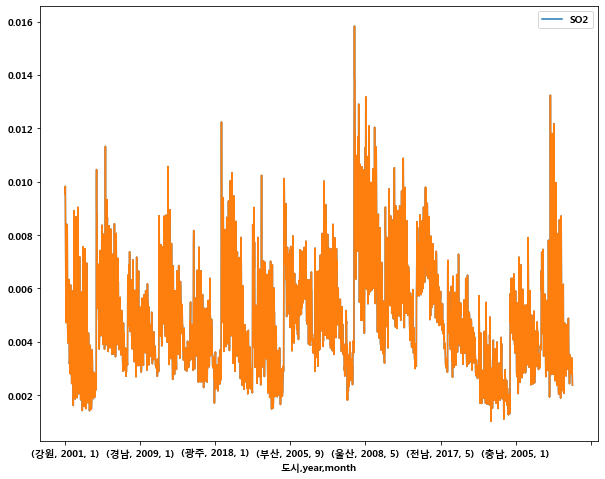

In [104]:
mean_by_month.plot(y='SO2')
mean_by_month["SO2"].plot()
#무언가 잘못됬음을 느꼈습니다.

In [99]:
by_month_unstack = mean_by_month.unstack()

In [100]:
by_month_unstack
##스택을 풀러준 데이터

SO2                                                              \
month          1         2         3         4         5         6         7    
도시 year                                                                         
강원 2001  0.009546  0.009828  0.008976  0.007513  0.005578  0.004722  0.006096   
   2002  0.007941  0.008264  0.008087  0.006352  0.004639  0.004307  0.004028   
   2003  0.006338  0.005767  0.005215  0.003793  0.003191  0.003243  0.003156   
   2005  0.006133  0.005532  0.005694  0.004910  0.003713  0.002772  0.003018   
   2006  0.005909  0.005813  0.004767  0.003083  0.002997  0.002053  0.001614   
...           ...       ...       ...       ...       ...       ...       ...   
충북 2017  0.004086  0.004620  0.004387  0.003318  0.003119  0.003099  0.002767   
   2018  0.004529  0.004639  0.004160  0.003411  0.003245  0.003636  0.003340   
   2019  0.004884  0.004198  0.003673  0.002984  0.003110  0.002732  0.002477   
   2020  0.003507  0.003354  0.003283  0.003168  0.002953  0.003173  0.002857   
   2021  0.003237  0.003089  0.002526  0.002378       NaN       NaN       NaN   

                                       ...       PM10                        \
month          8         9         10  ...         3          4          5    
도시 year                                ...                                    
강원 2001  0.005720  0.005442  0.006082  ...  55.463486  62.952434  55.232412   
   2002  0.004757  0.004590  0.003943  ...  75.126426  69.052683  33.779704   
   2003  0.002815  0.003115  0.003083  ...  62.819318  53.315276  66.583534   
   2005  0.002438  0.002469  0.003072  ...  65.298685  86.106574  51.567263   
   2006  0.001959  0.002518  0.003503  ...  87.843728  94.823425  51.937723   
...           ...       ...       ...  ...        ...        ...        ...   
충북 2017  0.002850  0.002903  0.002718  ...  58.780073  54.836538  57.672725   
   2018  0.003427  0.002978  0.003213  ...  50.193545  55.048507  43.536391   
   2019  0.002431  0.002433  0.002582  ...  67.275460  43.002883  49.824436   
   2020  0.002801  0.002907  0.003035  ...  43.907840  43.823187  34.334982   
   2021       NaN       NaN       NaN  ...  62.058298  41.120457        NaN   

                                                                           \
month           6          7          8          9          10         11   
도시 year                                                                     
강원 2001  52.324105  41.895779  31.191304  26.195693  38.945025  46.997358   
   2002  39.100184  37.205823  30.122220  38.075599  39.956538  48.199948   
   2003  59.689061  33.642741  31.886996  36.472430  39.753528  39.703194   
   2005  62.517747  57.598984  44.639934  30.441574  40.422491  62.050771   
   2006  54.461173  24.684647  33.535304  28.292685  53.735842  42.534814   
...            ...        ...        ...        ...        ...        ...   
충북 2017  41.213418  29.323386  23.206911  35.151389  32.880779  51.135258   
   2018  37.841927  31.275670  26.389699  26.811406  38.947524  64.762792   
   2019  37.304879  26.785188  26.984318  23.688544  33.448809  47.791241   
   2020  38.328016  19.239498  22.189264  23.676083  37.956701  42.008592   
   2021        NaN        NaN        NaN        NaN        NaN        NaN   

                    
month           12  
도시 year             
강원 2001  45.559718  
   2002  45.569887  
   2003  61.831989  
   2005  44.407914  
   2006  54.199044  
...            ...  
충북 2017  48.409466  
   2018  52.829173  
   2019  47.075937  
   2020  44.644441  
   2021        NaN  

[293 rows x 60 columns]

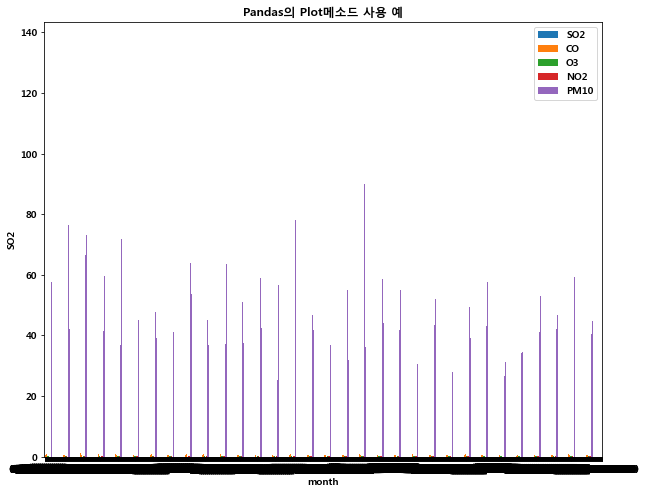

In [105]:
mean_by_month.plot.bar(rot=0)
plt.title("Pandas의 Plot메소드 사용 예")
plt.xlabel("month")
plt.ylabel("SO2")
plt.show()

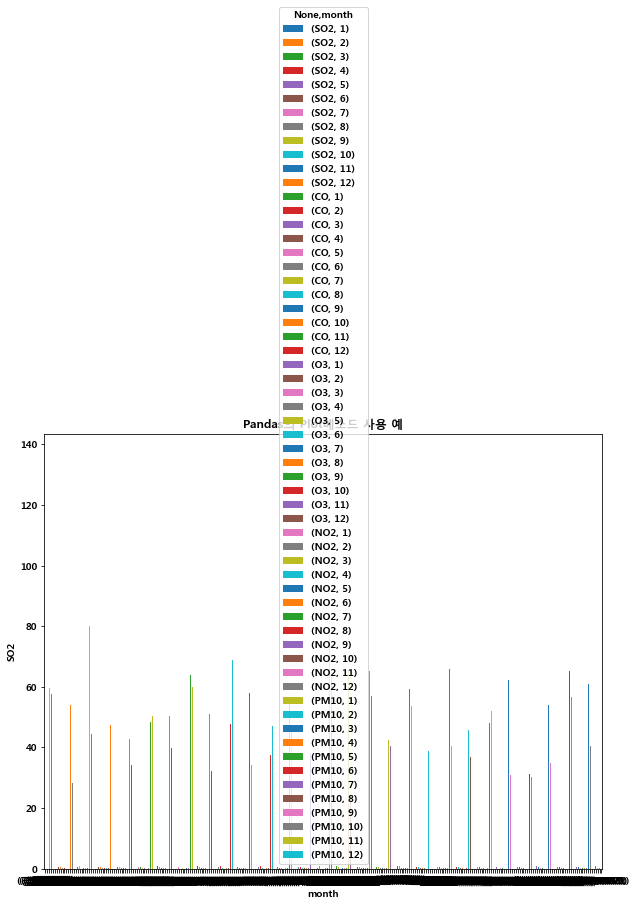

In [106]:
by_month_unstack.plot.bar(rot=0)
plt.title("Pandas의 Plot메소드 사용 예")
plt.xlabel("month")
plt.ylabel("SO2")
plt.show()

In [111]:
#도저히 한번에 표현할 수 없음을 느끼고 도시별로 
a = []
mean_by_month["year"].unique()

KeyError: 'year'

In [113]:
df = pd.read_csv('/Users/adam/mean_by_month.csv', encoding = 'utf-8')

In [114]:
df

,도시,year,month,SO2,CO,O3,NO2,PM10
0,강원,2001,1,0.009546,1.137472,0.021688,0.016230,48.173594
1,강원,2001,2,0.009828,1.311564,0.022627,0.014652,49.706774
2,강원,2001,3,0.008976,0.882373,0.028170,0.011898,55.463486
3,강원,2001,4,0.007513,0.839591,0.030089,0.014636,62.952434
4,강원,2001,5,0.005578,0.734517,0.033818,0.014684,55.232412
...,...,...,...,...,...,...,...,...
3375,충북,2020,12,0.003396,0.589687,0.016743,0.021458,44.644441
3376,충북,2021,1,0.003237,0.582357,0.019781,0.019425,43.746652
3377,충북,2021,2,0.003089,0.555466,0.028019,0.017426,46.606864
3378,충북,2021,3,0.002526,0.479545,0.033239,0.016461,62.058298


In [116]:
df['DATE'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))

In [117]:
df

,도시,year,month,SO2,CO,O3,NO2,PM10,DATE
0,강원,2001,1,0.009546,1.137472,0.021688,0.016230,48.173594,2001-01-01
1,강원,2001,2,0.009828,1.311564,0.022627,0.014652,49.706774,2001-02-01
2,강원,2001,3,0.008976,0.882373,0.028170,0.011898,55.463486,2001-03-01
3,강원,2001,4,0.007513,0.839591,0.030089,0.014636,62.952434,2001-04-01
4,강원,2001,5,0.005578,0.734517,0.033818,0.014684,55.232412,2001-05-01
...,...,...,...,...,...,...,...,...,...
3375,충북,2020,12,0.003396,0.589687,0.016743,0.021458,44.644441,2020-12-01
3376,충북,2021,1,0.003237,0.582357,0.019781,0.019425,43.746652,2021-01-01
3377,충북,2021,2,0.003089,0.555466,0.028019,0.017426,46.606864,2021-02-01
3378,충북,2021,3,0.002526,0.479545,0.033239,0.016461,62.058298,2021-03-01


In [118]:
df = df[["도시","DATE","SO2","CO","O3","NO2","PM10"]]

In [119]:
df

,도시,DATE,SO2,CO,O3,NO2,PM10
0,강원,2001-01-01,0.009546,1.137472,0.021688,0.016230,48.173594
1,강원,2001-02-01,0.009828,1.311564,0.022627,0.014652,49.706774
2,강원,2001-03-01,0.008976,0.882373,0.028170,0.011898,55.463486
3,강원,2001-04-01,0.007513,0.839591,0.030089,0.014636,62.952434
4,강원,2001-05-01,0.005578,0.734517,0.033818,0.014684,55.232412
...,...,...,...,...,...,...,...
3375,충북,2020-12-01,0.003396,0.589687,0.016743,0.021458,44.644441
3376,충북,2021-01-01,0.003237,0.582357,0.019781,0.019425,43.746652
3377,충북,2021-02-01,0.003089,0.555466,0.028019,0.017426,46.606864
3378,충북,2021-03-01,0.002526,0.479545,0.033239,0.016461,62.058298


<Figure size 720x576 with 0 Axes>

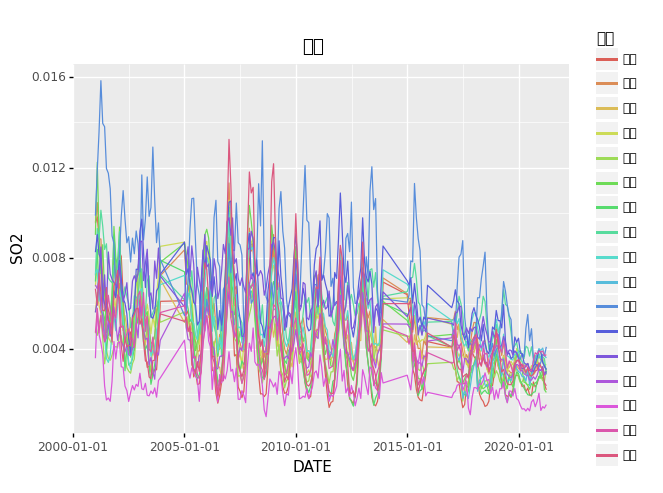

<ggplot: (8767068815086)>

In [164]:
from plotnine import*

fig = plt.figure()

(ggplot(df, aes(x="DATE", y='SO2', group ='도시', color = '도시'))
+geom_line()
+ggtitle('아러'))


### 한글 깨짐 해결 노력

In [179]:
import matplotlib
matplotlib.font_manager._rebuild()
import warnings
warnings.filterwarnings(action='ignore')

In [180]:
# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "/Users/adam/Downloads/nanum-all/ģŠīŪ ąÛēÃ/111.ģŠīŪ°íĩņ/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf").get_name()
rc('font', family = font_name)
plt.rc('font', family='NanumGothic')



In [181]:
for i in font_manager.fontManager.ttflist:
    if 'NanumGothic' in i.name:
        print(i.name, i.fname)

NanumGothic /Users/adam/Library/Fonts/NanumGothic.ttf


Text(0.3, 0.3, '한글')

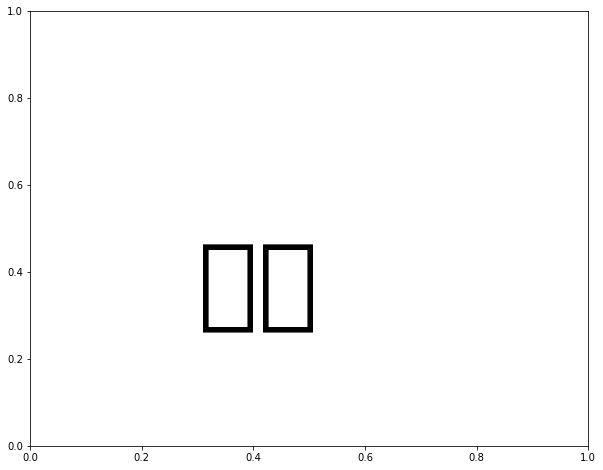

In [187]:
plt.rc('font', family='malgun')
plt.text(0.3, 0.3, '한글', size=100)

In [185]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', family ='NanumGothic')
mpl.rc('axes', unicode_minus=False)
mpl.rcParams['font.family']='malgun'

In [188]:
df.to_csv('re.csv', encoding = 'utf-8')